In [1]:
"""
# Se precisar baixar os dados:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")

print("Path to dataset files:", path)
"""

'\n# Se precisar baixar os dados:\n\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("miguelmallqui17/peru-student-enrollment-data-2023")\n\nprint("Path to dataset files:", path)\n'

https://www.kaggle.com/datasets/miguelmallqui17/peru-student-enrollment-data-2023?select=peru_student_enrollment_data_2023.csv

# About Dataset
This dataset contains student enrollment data from a Peruvian university for the year 2023. It presents challenges such as missing values ​​and inconsistent formatting, particularly in gender representation (1, 2, M, F, U), which requires data cleaning and transformation. The dataset allows for in-depth analysis of enrollment trends, among other indicators.

Description:

ENROLLMENT – Type of student enrollment:
- New: Student enrolling for the first time.
- Re-enrolled: Student continuing studies without interruption.
- Reinstated: Student returning after a period of inactivity.

TUITION PAYMENT MARCH 2022 – Indicates whether the student paid tuition in March 2022 (0 = No, 1 = Yes).

TUITION PAYMENT MARCH 2023 – Indicates whether the student paid tuition in March 2023 (0 = No, 1 = Yes).

GENDER – Student's gender (M, F, U, 1 ->(M), 2 ->(F)).

PROGRAM/MAJOR – Academic program or major the student is enrolled in.

SHIFT/SCHEDULE – Study schedule (Morning, Afternoon, Night, Mixed).

STUDY MODE – Study modality:

- On-site: Classes held at a physical campus.
- Online: Fully online classes.
- Remote: Online classes with some in-person activities.
- To be determined: Study mode not yet selected.

AGE RANGE OF ENROLLED STUDENT – Age range of enrolled students.

DEPARTMENT – Department where the student resides or studies.

PROVINCE – Province where the student resides or studies.

DISTRICT – District where the student resides or studies.

TYPE OF EDUCATIONAL INSTITUTION – Type of institution the student comes from (School, Institute, etc.).

INSTITUTION STATUS – Status of the institution (Public or Private).

BENEFIT DISCOUNTS – Indicates whether the student receives any financial benefits or discounts.

NUMBER OF ENROLLED COURSES – Number of courses the student is enrolled in.

AT-RISK COURSE – Indicates whether the student has courses at risk of failure.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('peru_student_enrollment_data_2023.csv', sep=';')
data

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,...,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,Reinscrito,1,1,F,NaN,UNIVERSIDAD,NaN,AREQUIPA,AREQUIPA,CAYMA,...,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,2,0
37578,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LURIGANCHO,...,UTP Virtual,Fac. Hum y CC Soc,PSICOLOGIA (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37579,Reinscrito,1,1,F,NaN,NaN,NaN,LIMA,LIMA,LIMA,...,UTP Virtual,Fac. Adm. Y Neg.,ADM. DE EMPRESAS (VIRTUAL),NOCHE,SIN BENEFICIO,Virtual,5. >=30,No,3,0
37580,Reinscrito,1,1,M,UNIVERSIDAD,PONTIFICIAUNIVERSIDADCATÓLIC,PRIVADA,LIMA,LIMA,CHORRILLOS,...,UTP Virtual,Fac. Ing. Ind. Y Mec.,ING. INDUSTRIAL (VIRTUAL),MIXTO,SIN BENEFICIO,Virtual,5. >=30,No,3,0


In [4]:
print("\nData info:")
data.info()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37582 entries, 0 to 37581
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ENROLLMENT                       37582 non-null  object
 1   TUITION PAYMENT MARCH 2022       37582 non-null  int64 
 2   TUITION PAYMENT MARCH 2023       37582 non-null  int64 
 3   GENDER                           37580 non-null  object
 4   TYPE OF EDUCATIONAL INSTITUTION  15868 non-null  object
 5   EDUCATIONAL INSTITUTION          18212 non-null  object
 6   INSTITUTION STATUS               15868 non-null  object
 7   DEPARTMENT                       36846 non-null  object
 8   PROVINCE                         36846 non-null  object
 9   DISTRICT                         36846 non-null  object
 10  CLASSIFICATION                   37581 non-null  object
 11  CAMPUS                           37582 non-null  object
 12  FACULTY             

In [5]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
ENROLLMENT                             0
TUITION PAYMENT MARCH 2022             0
TUITION PAYMENT MARCH 2023             0
GENDER                                 2
TYPE OF EDUCATIONAL INSTITUTION    21714
EDUCATIONAL INSTITUTION            19370
INSTITUTION STATUS                 21714
DEPARTMENT                           736
PROVINCE                             736
DISTRICT                             736
CLASSIFICATION                         1
CAMPUS                                 0
FACULTY                                1
PROGRAM/MAJOR                          1
SHIFT/SCHEDULE                        58
BENEFIT DISCOUNTS                      0
STUDY MODE                             0
AGE RANGE OF ENROLLED STUDENT          4
DISABILITY                             0
NUMBER OF ENROLLED COURSES             0
AT-RISK COURSE                         0
dtype: int64


In [6]:
# Drop columns with too many Nan:
data = data.drop(['TYPE OF EDUCATIONAL INSTITUTION','EDUCATIONAL INSTITUTION','INSTITUTION STATUS'], axis=1)

# Delete rows with NaN values:
data = data.dropna()

In [7]:
# The Gender issue:
data['GENDER'].value_counts()

GENDER
M    20555
F    15892
U      200
2       85
1       52
Name: count, dtype: int64

In [8]:
df = data # Backup

# 1. Identify Unique Values
print("\nUnique values in 'gender' column:", df['GENDER'].unique())

# 2. Define a Mapping for Transformation
gender_mapping = {
    1: 'M',
    '1': 'M',  # Handle potential string representations
    2: 'F',
    '2': 'F', # Handle potential string representations
    'M': 'M',
    'F': 'F',
    'U': 'U'
}

# 3. Apply the Mapping using .map()

# df['gender_cleaned'] = df['GENDER'].map(gender_mapping)
# print("\nDataFrame after mapping:\n")

df['GENDER'] = df['GENDER'].map(gender_mapping)

# 1. Identify Unique Values
print("\nUnique values in 'GENDER' column:", df['GENDER'].unique())


Unique values in 'gender' column: ['M' 'F' 'U' '2' '1']

Unique values in 'GENDER' column: ['M' 'F' 'U']


In [9]:
# Showing unique values for each column so we can analyze:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30)

Unique values in column 'ENROLLMENT':
['Nuevo' 'Reincorporado' 'Reinscrito']
------------------------------
Unique values in column 'TUITION PAYMENT MARCH 2022':
[0 1]
------------------------------
Unique values in column 'TUITION PAYMENT MARCH 2023':
[0 1]
------------------------------
Unique values in column 'GENDER':
['M' 'F' 'U']
------------------------------
Unique values in column 'DEPARTMENT':
['LIMA' 'CALLAO' 'AMAZONAS' 'ICA' 'AREQUIPA' 'SAN MARTIN' 'JUNIN'
 'LA LIBERTAD' 'HUANUCO' 'AYACUCHO' 'ANCASH' 'PASCO' 'CUSCO' 'LAMBAYEQUE'
 'HUANCAVELICA' 'PIURA' 'CAJAMARCA' 'APURIMAC' 'PUNO' 'UCAYALI'
 'MADRE DE DIOS' 'LORETO' 'TACNA' 'MOQUEGUA' 'TUMBES']
------------------------------
Unique values in column 'PROVINCE':
['LIMA' 'CALLAO' 'RODRIGUEZ DE MENDOZA' 'CHINCHA' 'CAYLLOMA' 'SAN MARTIN'
 'CANETE' 'YAULI' 'NAZCA' 'HUAURA' 'TRUJILLO' 'HUANCAYO' 'HUANUCO'
 'BARRANCA' 'ICA' 'HUAROCHIRI' 'CANTA' 'OYON' 'VICTOR FAJARDO' 'AREQUIPA'
 'HUAMANGA' 'SANTA' 'PARINACOCHAS' 'OXAPAMPA' 'CUSCO

In [10]:
# Handle categorical features
df = pd.get_dummies(data, columns=['DEPARTMENT',
                                     'PROVINCE',
                                     'DISTRICT',
                                     'GENDER',
                                     'DISABILITY',
                                     'STUDY MODE',
                                     'SHIFT/SCHEDULE',
                                     'PROGRAM/MAJOR',
                                     'ENROLLMENT',
                                     'CLASSIFICATION',
                                     'CAMPUS',
                                     'FACULTY',
                                     'AGE RANGE OF ENROLLED STUDENT',
                                     'BENEFIT DISCOUNTS'], 
                                     drop_first=True) # drop_first=True to avoid multicollinearity

In [11]:
# Explicitly cast the dummy columns to integer type (instead of boolean)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [12]:
# Showing unique values for each column so we can verify the changes:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-" * 30)

Unique values in column 'TUITION PAYMENT MARCH 2022':
[0 1]
------------------------------
Unique values in column 'TUITION PAYMENT MARCH 2023':
[0 1]
------------------------------
Unique values in column 'NUMBER OF ENROLLED COURSES':
[0 3 1 2 4 5 6]
------------------------------
Unique values in column 'AT-RISK COURSE':
[0 2 1 3 5 4]
------------------------------
Unique values in column 'DEPARTMENT_ANCASH':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_APURIMAC':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_AREQUIPA':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_AYACUCHO':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_CAJAMARCA':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_CALLAO':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_CUSCO':
[0 1]
------------------------------
Unique values in column 'DEPARTMENT_HUANCAVELICA


TUITION PAYMENT MARCH 2023 distribution:
TUITION PAYMENT MARCH 2023
1    30993
0     5791
Name: count, dtype: int64 TUITION PAYMENT MARCH 2023
1    0.842567
0    0.157433
Name: proportion, dtype: float64


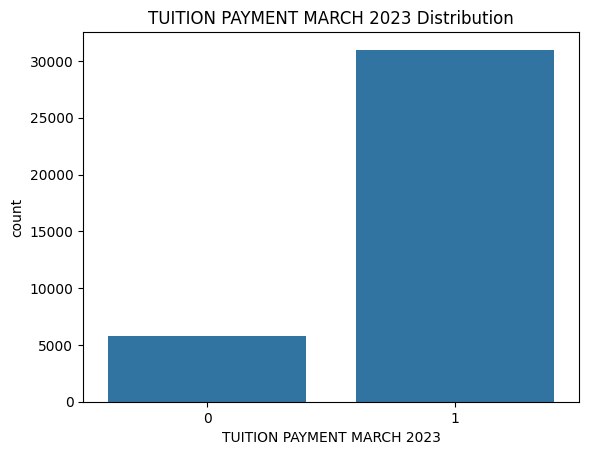

In [13]:
# Check the distribution of the target variable (Churn)
print("\nTUITION PAYMENT MARCH 2023 distribution:")
print(data['TUITION PAYMENT MARCH 2023'].value_counts(), data['TUITION PAYMENT MARCH 2023'].value_counts(normalize=True))
sns.countplot(x='TUITION PAYMENT MARCH 2023', data=data)
plt.title('TUITION PAYMENT MARCH 2023 Distribution')
plt.show()

Feature engineering:

In [14]:
data = df
del df 

# Separate features (X) and target (y)
X = data.drop('TUITION PAYMENT MARCH 2023', axis=1)
y = data['TUITION PAYMENT MARCH 2023']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets (already done in the previous step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape of training features after engineering and scaling:", X_train_scaled.shape)
print("Shape of testing features after engineering and scaling:", X_test_scaled.shape)


Shape of training features after engineering and scaling: (29427, 1012)
Shape of testing features after engineering and scaling: (7357, 1012)


Model Selection and Training

In [16]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
y_pred_lr = logistic_regression.predict(X_test_scaled)
y_pred_proba_lr = logistic_regression.predict_proba(X_test_scaled)[:, 1]

In [17]:
# Evaluate performance:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_lr))
print("-" * 30)

Logistic Regression:
Accuracy: 0.9802908794345522
Precision: 0.9783501896333755
Recall: 0.998709469269237
F1-Score: 0.9884250019956893
ROC AUC: 0.9574768452541651
------------------------------


In [18]:
pd.set_option('display.max_rows', None) #pd.reset_option('display.max_rows') # Optional: Reset to default after printing

In [19]:
# Checking up for coefficients:
coefficients = logistic_regression.coef_[0]
feature_names = X_train.columns 

# Create a DataFrame to display coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Coefficients:")
print(coefficients_df)

Logistic Regression Coefficients:
                                                Feature  Coefficient
0                            TUITION PAYMENT MARCH 2022     4.884359
977                               ENROLLMENT_Reinscrito     0.464686
592                                 DISTRICT_PACHACAMAC     0.304888
452                                       DISTRICT_JAEN     0.290828
54                                      PROVINCE_CANETE     0.290578
29                                 PROVINCE_ANDAHUAYLAS     0.269077
905            PROGRAM/MAJOR_ADMINISTRACION Y MARKETING     0.240592
963                PROGRAM/MAJOR_INGENIERÍA DE SOFTWARE     0.237090
923                        PROGRAM/MAJOR_ING. BIOMEDICA     0.229226
919           PROGRAM/MAJOR_DISEÑO DIGITAL PUBLICITARIO     0.208467
517                          DISTRICT_MAGDALENA DEL MAR     0.199039
483                                DISTRICT_LA TINGUINA     0.190389
207                                      DISTRICT_ANCON     0.186109


In [20]:
# Get the intercept
intercept = logistic_regression.intercept_[0]
print(f"\nLogistic Regression Intercept: {intercept:.4f}")


Logistic Regression Intercept: 2.5973


Probability >= 0.5: The model predicts the customer will churn (class 1).

Probability < 0.5: The model predicts the customer will not churn (class 0).